![](https://media-exp1.licdn.com/dms/image/C4E1BAQEP1qSz0r5URg/company-background_10000/0?e=2159024400&v=beta&t=NSPcEPkWo2GFIWArtamt_15UgvQPq02_CQd5Efay5gg)

# Desafio Codenation - AceleraDev Data Science
## Descubra as melhores notas de matemática do ENEM 2016
_______

#### Desafio
Criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. 

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.


#### Requisitos
- Lógica
- Análise de dados
- Estatística
- Regression


#### Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação. Determine os 20 melhores colocados, por ordem, para os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão "Submeter resposta".

#### Aprovação

O modelo enviado deverá atingir o score maior ou igual a 90% para ser aprovado.


#### Fonte
https://codenation.dev/aceleradev/ds-online-2/
___________________

### Importando as bibliotecas

In [901]:
import pandas as pd
import numpy as np
from IPython.display import Image
import joblib

# visualização gráfica
import seaborn as sns 
import matplotlib.pyplot as plt

# estatísticas
from pandas_profiling import ProfileReport

# modelo
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics

## Análise Exploratória
_______

In [904]:
# importa os arquivos teste e train
test = pd.read_csv('./dataset/test.csv', sep=",",encoding="utf-8")
train = pd.read_csv('./dataset/train.csv',sep=",",encoding="utf-8")

# cria o dataset de respostas que será enviado ao desafio
df_resposta = pd.DataFrame()

# insere a coluna de inscrição
df_resposta['NU_INSCRICAO'] = test['NU_INSCRICAO'] 

In [905]:
# visualiza os dados do arquivo train
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [906]:
# visualiza os dados do arquivo test
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [907]:
# verificar se os dados de teste estão nos dados de treinamento
print(set(test.columns).issubset(set(train.columns)))

True


In [908]:
# verifica as colunas que constam nos dois arquivos.
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [909]:
train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [910]:
# verifica o tamanho dos dados linhas e colunas
print('Dados Teste:', test.shape) 
print('Dados Treino:',train.shape)

Dados Teste: (4576, 47)
Dados Treino: (13730, 167)


Os dados de treino e teste possuem tamanhos diferentes, o teste possui apenas 47 colunas o que limita um pouco a escolha das features para criar o modelo. 

### Profile Report

O pandas profiling é uma ferramenta que gera um relatório com informações estatísticas e as principais características do seu dataframe.

___

In [75]:
# executando o profile
profile = ProfileReport(test, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [76]:
# salvando o relatório no disco para acesso numa página externa. 
profile.to_file(output_file="Relatorio_test.html")

In [ ]:
# visualiza o relatório no notebook
profile

 Após a análise das variáveis no profile seleciona aquelas que serão as features do modelo.

## Seleciona as Features e Valida a Correlação

____

As features selecionadas foram: 

**NU_NOTA_MT -** Nota da prova de Matemática - **Essa é a variável alvo**
\
**NU_IDADE -** Idade
\
**TP_ST_CONCLUSAO -** Situação de conclusão do Ensino Médio (Já concluiu o Ensino Médio, Estou cursando, etc)
\
**NU_NOTA_COMP1 -** Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
\
**NU_NOTA_COMP2 -** Nota da competência 2 - Compreender a proposta de redação.
\
**NU_NOTA_COMP3 -** Nota da competência 3 - Relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
\
**NU_NOTA_COMP4 -** Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
\
**NU_NOTA_COMP5 -** Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
\
**NU_NOTA_CN -** Nota da prova de Ciências da Natureza
\
**NU_NOTA_CH -** Nota da prova de Ciências Humanas
\
**NU_NOTA_LC -** Nota da prova de Linguagens e Códigos
\
**NU_NOTA_REDACAO -** Nota da prova de redação
\
**Q006 -** Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
\
**Q001 -** Até que série seu pai, ou o homem responsável por você, estudou?
\
**Q002 -** Até que série sua mãe, ou a mulher responsável por você, estudou?
\
**SG_UF_RESIDENCIA -** Sigla da Unidade da Federação de residência

_____

In [911]:
# selecionando as features
features = ['NU_IDADE',
       'TP_ST_CONCLUSAO',
       'NU_NOTA_COMP1',
       'NU_NOTA_COMP2',
       'NU_NOTA_COMP3',
       'NU_NOTA_COMP4',
       'NU_NOTA_COMP5',
       'NU_NOTA_CN',
       'NU_NOTA_CH',
       'NU_NOTA_LC',
       'NU_NOTA_REDACAO',
        'Q006',
        'Q001',
        'Q002',
        'SG_UF_RESIDENCIA',
        'NU_NOTA_MT']

In [913]:
# features_test sem a nota de matemática para fazer a correlação
features_test =['NU_IDADE',
       'TP_ST_CONCLUSAO',
       'NU_NOTA_COMP1',
       'NU_NOTA_COMP2',
       'NU_NOTA_COMP3',
       'NU_NOTA_COMP4',
       'NU_NOTA_COMP5',
       'NU_NOTA_CN',
       'NU_NOTA_CH',
       'NU_NOTA_LC',
       'NU_NOTA_REDACAO',
        'Q006',
        'Q001',
        'Q002',
        'SG_UF_RESIDENCIA']

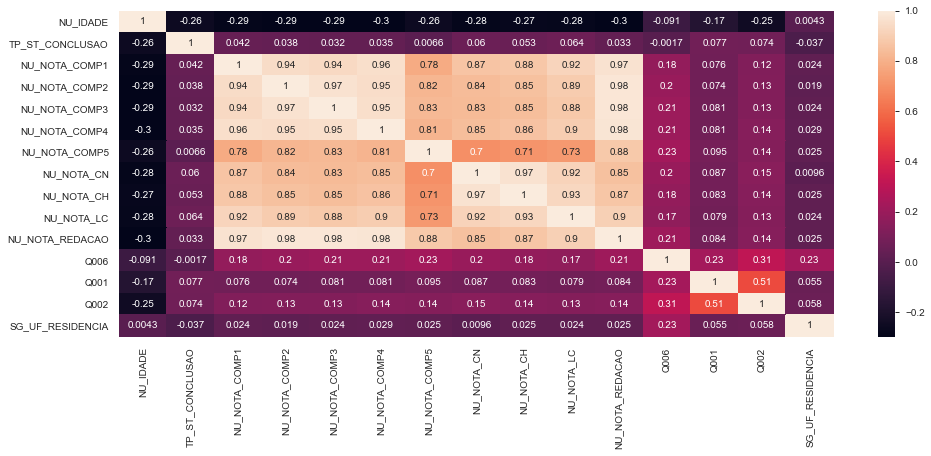

In [914]:
# mapa de calor para visualizar a correlação entre as variáveis escolhidas para as features_test
correlacoes_features = df_test[features_test].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes_features, annot=True)

Algumas das features escolhidas possuem uma correlação alta a moderada.

### Tratamento das Features
____

In [915]:
# faz uma cópia do dataframe importado
df_train = train.copy()
df_test = test.copy()

In [920]:
# mostra a quantidade de campos nulos em train
df_train[features].isnull().sum()

NU_IDADE               0
TP_ST_CONCLUSAO        0
NU_NOTA_COMP1       3597
NU_NOTA_COMP2       3597
NU_NOTA_COMP3       3597
NU_NOTA_COMP4       3597
NU_NOTA_COMP5       3597
NU_NOTA_CN          3389
NU_NOTA_CH          3389
NU_NOTA_LC          3597
NU_NOTA_REDACAO     3597
Q006                   0
Q001                   0
Q002                   0
SG_UF_RESIDENCIA       0
NU_NOTA_MT          3597
dtype: int64

In [921]:
# mostra a quantidade de campos nulos em test
df_test[features_test].isnull().sum()

NU_IDADE               0
TP_ST_CONCLUSAO        0
NU_NOTA_COMP1       1199
NU_NOTA_COMP2       1199
NU_NOTA_COMP3       1199
NU_NOTA_COMP4       1199
NU_NOTA_COMP5       1199
NU_NOTA_CN          1134
NU_NOTA_CH          1134
NU_NOTA_LC          1199
NU_NOTA_REDACAO     1199
Q006                   0
Q001                   0
Q002                   0
SG_UF_RESIDENCIA       0
dtype: int64

In [918]:
# verifica quantos campos nulos tem na variável alvo
df_train['NU_NOTA_MT'].isnull().sum()

3597

### Tratamento dos Campos Nulos
____

Algumas das possibilidades para tratar campos nulos são:

    - Exclui esses dados do dataset;
    - Preencher os campos com a média dos valores do campo e
    - Preencher os campos nulos com zeros.
    
A variável alvo "NU_NOTA_MT" possui 3.597 campos nulos o que pode indicar um erro de preenchimento no campo,\
ou o candidato não compareceu a prova e/ou deixou em branco.\
Preencher com a média dos valores não parece correto ,pois estaria afirmando que o canditado fez prova e atribuindo uma valor errado. 

Como o dataset possui poucos registros excluir os campos nulos pode ser prejudicial para o modelo.
\
Preencher com a média dos valores não seria correto para a variável alvo. 

Por fim, restou **preencher os campos nulos com zeros** e dessa forma o modelo não será treinado com valores nulos. 
___

In [922]:
# substitui os campos nulos das features por zero
df_train = df_train[features].fillna(0)
df_train.isnull().sum()

NU_IDADE            0
TP_ST_CONCLUSAO     0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
Q006                0
Q001                0
Q002                0
SG_UF_RESIDENCIA    0
NU_NOTA_MT          0
dtype: int64

In [923]:
# substitui os campos nulos das features por zero
df_test = df_test[features_test].fillna(0)
df_test.isnull().sum()

NU_IDADE            0
TP_ST_CONCLUSAO     0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
Q006                0
Q001                0
Q002                0
SG_UF_RESIDENCIA    0
dtype: int64

In [924]:
# remove a variável target de features
features.remove('NU_NOTA_MT')

In [925]:
# transforma as features não númericas em campos númericos
LE = LabelEncoder()

# features de treino
df_train['SG_UF_RESIDENCIA'] = LE.fit_transform(df_train['SG_UF_RESIDENCIA'])
df_train['Q006'] = LE.fit_transform(df_train['Q006'])
df_train['Q001'] = LE.fit_transform(df_train['Q001'])
df_train['Q002'] = LE.fit_transform(df_train['Q002'])

# features de teste
df_test['SG_UF_RESIDENCIA'] = LE.fit_transform(df_test['SG_UF_RESIDENCIA'])
df_test['Q006'] = LE.fit_transform(df_test['Q006'])
df_test['Q001'] = LE.fit_transform(df_test['Q001'])
df_test['Q002'] = LE.fit_transform(df_test['Q002'])

## Validando o melhor modelo
______

Dado que os requisitos do desafio pedem uma regressão, foram testado dos seguintes algoritmos: 

   **> LinearRegression:** A regressão linear é um modelo para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. 


   **> KNeighborsRegressor:** O algoritmo KNN pode ser usado para problemas de classificação e regressão baseada em k-vizinhos mais próximos.

   **> DecisionTreeRegressor:** Um regressor de árvore de decisão que constrói modelos de regressão ou classificação na forma de uma estrutura em árvore.

   **> GradientBoostRegressor:** Constói um modelo aditivo de forma progressiva; permite a otimização de funções de perda diferenciáveis arbitrárias.\
        Em cada estágio, uma árvore de regressão é ajustada no gradiente negativo da função perda fornecida.

   **> RandomForestRegressor:** Modelo que funciona através de uma floresta aleatória é um meta-estimador que se encaixa em várias árvores de decisão classificadoras em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. Não há interação entre essas árvores durante a construção das árvores.
   
   **> RadiusNeighborsRegressor:** Regressão baseada em vizinhos em um raio fixo. O alvo é previsto pela interpolação local dos alvos associados aos vizinhos mais próximos no conjunto de treinamento.
   
   **> SGDRegressor:** SGD significa Stochastic Gradient Descent: o gradiente da perda é estimado cada amostra de cada vez e o modelo é atualizado ao longo do caminho com um cronograma de força decrescente (também conhecido como taxa de aprendizado).
   
   **> ExtraTreesRegressor:** O modelo implementa um meta-estimador que se encaixa em várias árvores de decisão aleatórias (também conhecidas como extra-árvores) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo.
   
   **> AdaBoostRegressor:** AdaBoost é um meta-estimador que começa ajustando um regressor no conjunto de dados original e depois ajusta cópias adicionais do regressor no mesmo conjunto de dados, mas onde os pesos das instâncias são ajustados de acordo com o erro da previsão atual.
   Assim, os regressores subsequentes se concentram mais em casos difíceis.
   
   Fonte: https://scikit-learn.org/stable/index.html 
  ______

In [927]:
# função para validar os modelos
def validaPerformanceModelos(pipelines,x_train,y_train):
    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=5, random_state=21, shuffle=True)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [928]:
pipelines = []
pipelines.append(('LRE', Pipeline([('Scaler', MinMaxScaler()),('LRE',LinearRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', MinMaxScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('RFR', Pipeline([('Scaler', MinMaxScaler()),('RFR', RandomForestRegressor())])))
pipelines.append(('RNR', Pipeline([('Scaler', MinMaxScaler()),('RNR', RadiusNeighborsRegressor())])))
pipelines.append(('SGD', Pipeline([('Scaler', MinMaxScaler()),('SGD', SGDRegressor())])))
pipelines.append(('ETR', Pipeline([('Scaler', MinMaxScaler()),('ETR', ExtraTreesRegressor())])))
pipelines.append(('ADA', Pipeline([('Scaler', MinMaxScaler()),('ADA', AdaBoostRegressor())])))

In [929]:
X_train = df_train[features]
y_train = df_train['NU_NOTA_MT']
X_test = df_test[features]   

In [930]:
validaPerformanceModelos(pipelines, x_train, y_train)

LRE: -4964.754977 (153.027810)
KNN: -5359.210283 (92.091750)
DTR: -8292.536588 (171.491225)
GBM: -3946.608843 (62.164964)
RFR: -4120.484055 (95.397052)
RNR: -6409.487439 (181.909683)
SGD: -4994.517028 (147.639544)
ETR: -4102.370517 (50.092303)
ADA: -5799.175407 (427.294123)


Os algoritmos que possuem o menor valor de erro médio são: GradientBoostingRegressor, RandomForestRegressor e ExtraTreesRegressor.

### Usando o modelo GradientBoostRegressor
___

In [931]:
# importa o modelo GradientBoostingRegressor
pipe_GBM = Pipeline([('scaler',StandardScaler()),('GradientBoostingRegressor',GradientBoostingRegressor())])

In [932]:
CV_pipe_GBM = RandomizedSearchCV(estimator = pipe_GBM, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [933]:
CV_pipe_GBM.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('GradientBoostingRegressor',
                                              GradientBoostingRegressor(alpha=0.9,
                                                                        ccp_alpha=0.0,
                                                                        criterion='friedman_mse',
                                                                        init=None,
                                                                        learning_rate=0.1,
                                                                        loss='ls',
                        

In [934]:
# faz a predição das notas de matemática
y_pred = CV_pipe_GBM.predict(X_test)

In [935]:
# armazena as notas que o modelo preveu no dataset resposta
df_resposta['NU_NOTA_MT'] = np.around(y_pred,2)

In [936]:
# verifica as notas de matemáticas estimadas
df_resposta['NU_NOTA_MT'].unique()

array([430.22, 448.39, 590.02, ..., 471.  , 654.58, 448.43])

In [937]:
# verifica o dataset final
df_resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.22
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,448.39
2,b38a03232f43b11c9d0788abaf060f7366053b6d,590.02
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,1.12
4,715494628a50142ce8cb17191cfe6d0f3cae0934,563.65


In [429]:
# gera o arquivo de respostas com a inscrição do aluno e a nota de matemática predita
df_resposta.to_csv('answer.csv', index=False, header=True)

### Score do modelo obtido no desafio Codenation
___

Submetido o modelo no site do Codenation, o resultado obtido foi de 93,68%, logo foi alcançado a aprovação no desafio.

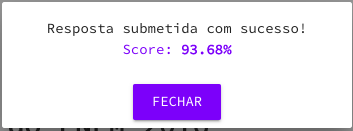

In [526]:
Image('Score_Modelo.png')

___________

## Inserindo mais features no modelo
___

In [938]:
# faz uma cópia do dataframe importado
df2_train = train.copy()
df2_test = test.copy()

In [939]:
# valida os tamanhos dos dados
print(df2_test.shape)
print(df2_train.shape)

(4576, 47)
(13730, 167)


In [898]:
# valida as colunas existentes em test
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [946]:
# verifica as variáveis já existem em features, sem considerar a variável alvo
print('Quantidade de Features:', len(features))
features

Quantidade de Features: 15


['NU_IDADE',
 'TP_ST_CONCLUSAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'Q006',
 'Q001',
 'Q002',
 'SG_UF_RESIDENCIA']

## Seleção das Variáveis
_____

As variáveis selecionadas para adicionar em features são:

   **TP_SEXO-** Sexo (Feminino ou Masculino) 
   \
   **TP_COR_RACA-** Cor/raça
   \
   **TP_ANO_CONCLUIU -** Ano de Conclusão do Ensino Médio
   \
   **Q026 -** Você exerce ou já exerceu atividade remunerada?
   \
   **Q027 -** Com que idade você começou a exercer uma atividade remunerada?
   \
   **Q047 -** Em que tipo de escola você frequentou o Ensino Médio?
   _____

In [947]:
# converte essas colunas em string para posterior transformação
df2_train['Q027']= df2_train['Q027'].astype(str)
df2_test['Q027']= df2_test['Q027'].astype(str)

In [948]:
features2 =['NU_IDADE',
            'TP_SEXO',
            'TP_COR_RACA',
            'TP_ST_CONCLUSAO',
            'TP_ANO_CONCLUIU',
            'NU_NOTA_COMP1',
           'NU_NOTA_COMP2',
           'NU_NOTA_COMP3',
           'NU_NOTA_COMP4',
           'NU_NOTA_COMP5',
           'NU_NOTA_CN',
           'NU_NOTA_CH',
           'NU_NOTA_LC',
            'NU_NOTA_REDACAO',
            'Q006',
            'Q001',
            'Q002',
            'Q026',
            'Q027',
            'Q047',
            'SG_UF_RESIDENCIA',
            'NU_NOTA_MT'] 

In [951]:
# valida a quantidade final de features com a variável alvo
print('Quantidade de Features:',len(features2))

Quantidade de Features: 22


**Preencher os campos nulos com zeros**

In [952]:
# substitui os campos nulos das features por zero
df2_train = df2_train[features2].fillna(0)
df2_train.isnull().sum()

NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
Q006                0
Q001                0
Q002                0
Q026                0
Q027                0
Q047                0
SG_UF_RESIDENCIA    0
NU_NOTA_MT          0
dtype: int64

In [953]:
# remove a variável target de features
features2.remove('NU_NOTA_MT')

In [954]:
# substitui os campos nulos das features por zero
df2_test= df2_test[features2].fillna(0)
df2_test.isnull().sum()

NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
Q006                0
Q001                0
Q002                0
Q026                0
Q027                0
Q047                0
SG_UF_RESIDENCIA    0
dtype: int64

In [955]:
# transforma as features não númericas em campos númericos
LE = LabelEncoder()

# features de treino
df2_train['SG_UF_RESIDENCIA'] = LE.fit_transform(df2_train['SG_UF_RESIDENCIA'])
df2_train['TP_SEXO'] = LE.fit_transform(df2_train['TP_SEXO'])
df2_train['Q006'] = LE.fit_transform(df2_train['Q006'])
df2_train['Q001'] = LE.fit_transform(df2_train['Q001'])
df2_train['Q002'] = LE.fit_transform(df2_train['Q002'])
df2_train['Q026'] = LE.fit_transform(df2_train['Q026'])
df2_train['Q027'] = LE.fit_transform(df2_train['Q027'])
df2_train['Q047'] = LE.fit_transform(df2_train['Q047'])

# features de teste
df2_test['SG_UF_RESIDENCIA'] = LE.fit_transform(df2_test['SG_UF_RESIDENCIA'])
df2_test['TP_SEXO'] = LE.fit_transform(df2_test['TP_SEXO'])
df2_test['Q006'] = LE.fit_transform(df2_test['Q006'])
df2_test['Q001'] = LE.fit_transform(df2_test['Q001'])
df2_test['Q002'] = LE.fit_transform(df2_test['Q002'])
df2_test['Q026'] = LE.fit_transform(df2_test['Q026'])
df2_test['Q027'] = LE.fit_transform(df2_test['Q027'])
df2_test['Q047'] = LE.fit_transform(df2_test['Q047'])

In [956]:
X2_train = df2_train[features2]
y2_train = df2_train['NU_NOTA_MT']
X2_test = df2_test[features2]   

In [957]:
# importa o modelo GradientBoostingRegressor
pipe_GBM = Pipeline([('scaler',StandardScaler()),('GradientBoostingRegressor',GradientBoostingRegressor())])
CV_pipe_GBM = RandomizedSearchCV(estimator = pipe_GBM, param_distributions = {},cv = 5,return_train_score=True, verbose=0)
CV_pipe_GBM.fit(X2_train, y2_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('GradientBoostingRegressor',
                                              GradientBoostingRegressor(alpha=0.9,
                                                                        ccp_alpha=0.0,
                                                                        criterion='friedman_mse',
                                                                        init=None,
                                                                        learning_rate=0.1,
                                                                        loss='ls',
                        

In [958]:
# faz a predição das notas de matemática
y_pred2 = CV_pipe_GBM.predict(X2_test)

In [959]:
# cria o dataset de respostas que será enviado ao desafio
df2_resposta = pd.DataFrame()

# insere a coluna de inscrição
df2_resposta['NU_INSCRICAO'] = test['NU_INSCRICAO'] 

In [960]:
# armazena as notas que o modelo preveu no dataset resposta
df2_resposta['NU_NOTA_MT'] = np.around(y_pred2,2)

In [894]:
# gera o arquivo de respostas com a inscrição do aluno e a nota de matemática predita
df2_resposta.to_csv('answer.csv', index=False, header=True)

In [961]:
# verifica o dataset final
df2_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.91
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.08
2,b38a03232f43b11c9d0788abaf060f7366053b6d,585.55
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.88
4,715494628a50142ce8cb17191cfe6d0f3cae0934,556.88
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,451.53
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,477.26
4573,655fa6306720ff16e825903b5422a46608a77545,684.38
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,460.26


### Score do modelo obtido no desafio Codenation
____

Submetido o novo modelo no site do Codenation, o resultado obtido foi de 93,78%, alcançado um acréscimo de 0,10% em relação ao modelo inicial.

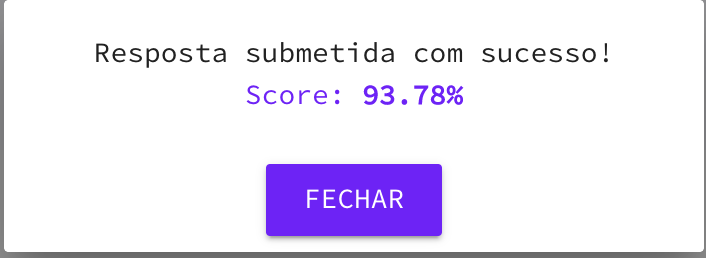

In [965]:
Image('Score_Modelo2.png')

____
## Conclusão
___

O objetivo do desafio é avaliar a capacidade do canditado de resolver problemas utilizando lógica, estatística e instrumentos que auxiliem no desenvolvimento do modelo.

Para participar do programa de capacitação a nota de corte para aprovação no desafio é de 90%.

Foi utilizado para esse desafio o modelo **GradientBoostRegressor** com 15 features obtendo um **score de 93,68%.** 

Em seguida, foi **acrescido mais 06 variáveis nas features** o que totalizou 22 variáveis, com isso o modelo obteve um melhora no **score para 93,78%.**

Os dados fornecidos já estavam dividos em test e train e com tamanhos distintos o que dificultava usar técnicas de Feature Selection.

Além de ser um base de dados pequena e com um problema proposto razoávelmente simples.

Contudo, o objetivo do score foi alcançado e consequentemente a aprovação no programa.

____